# Funtion Template

## F1: loading data in a dataframe (either CSV or Excel - can be generalized for databases)

In [1]:
import pandas as pd
import sqlite3

def load_data(file_type, file_path):
    if file_type == "csv":
        df = pd.read_csv(file_path)
    elif file_type == "excel":
        df = pd.read_excel(file_path)
    elif file_type == "sqlite":
        conn = sqlite3.connect(file_path)
        df = pd.read_sql_query("SELECT * FROM tablename", conn)
    else:
        raise ValueError("Invalid source type")

    return df


## F2: checking shape, column types, and see the first/last &#39;n&#39; rows using head/tail (where n is one of
the arguments of F2)

In [ ]:
def check_data(df,n):
    return print(f"shape of dataframe is {df.shape}  ,\n\n\nTop {n} entries are \n {df.head(n)} ,\n\n\nBottom {n} entries are \n{df.tail(n)} \n\n\nType of data columns is \n {df.dtypes}\n\n\n\n overview of dataset \n{df.describe()}")


## F3: remove unnecessary/useless columns

In [ ]:
#To drop undesired columns
def drop_columns(df, columns_to_drop):
  ndf = df.drop(columns=columns_to_drop)
  return ndf

## F4: remove rows containing a particular value of a given column,

In [ ]:
  #to delete rows with specific value in df
def delete_rows_with_values(df, column, values):
    return df[~df[column].isin(values)]


## F5: determine the missing values in the whole dataset

In [ ]:
  # To find missing values in dataset by columns
def find_missing_values(df):
    return df.isnull().sum()

  # find percentage of missing values in the dataaset
def missing_percentage(df):
      import numpy as np
      total_cells = np.product(df.shape)
      total_missing = df.isnull().sum().sum()
      return (total_missing/total_cells) * 100


## F6: analyze missing values of one or more columns using mano module

<Axes: >

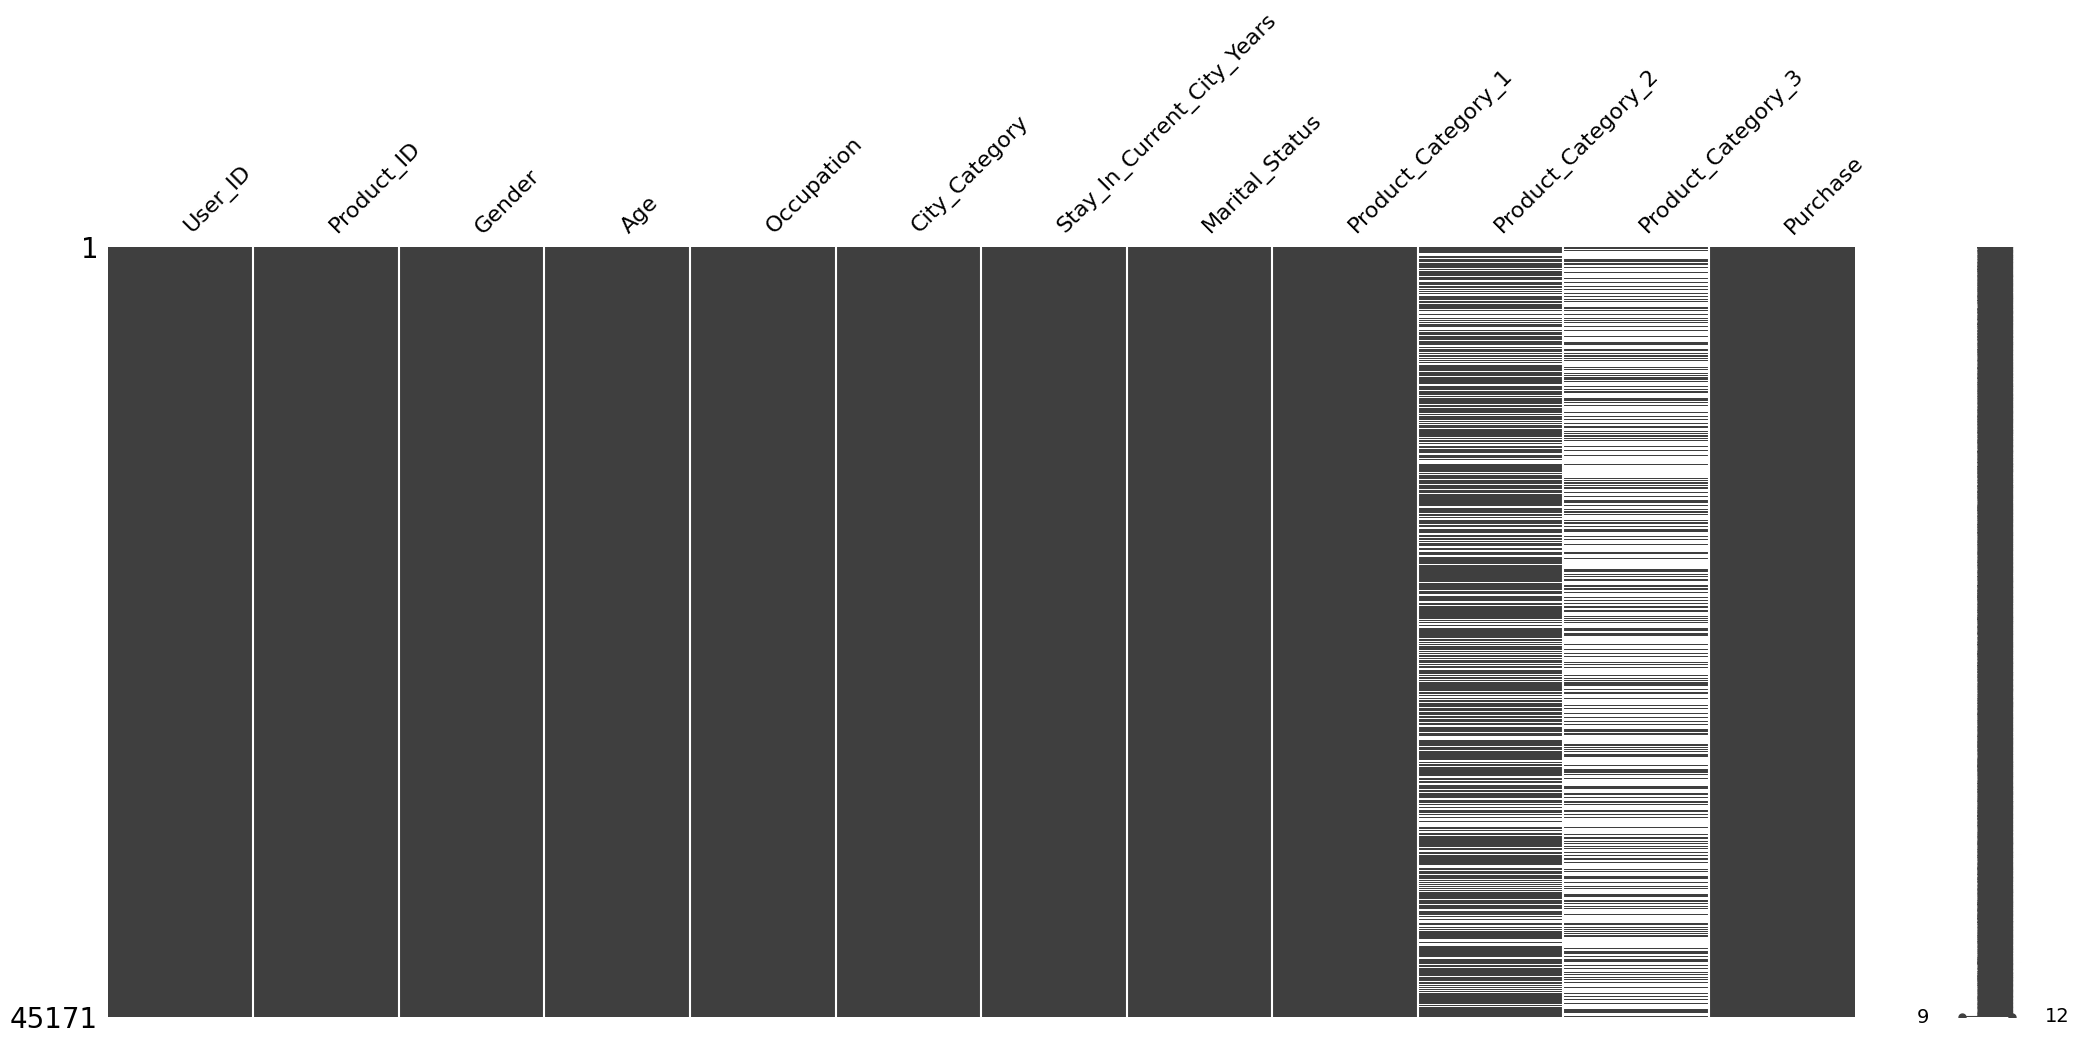

In [ ]:
import missingno as msno
  #to analyze missing values by column using mano module
def analyze_missing_values(df, column):
    subset_df = df[[column]]
    return msno.matrix(subset_df)

  #to analyze missing values by datframe using mano module
def analyze_missing(df):
    import missingno as msno
    return msno.matrix(df)
df = pd.read_csv("train.csv")
analyze_missing(df)

## F7: cater for missing values (input the column with missing value, and the method through which you want to cater for the missing values)

In [ ]:
def handle_missing_values(df, column_name, method, value=None):
    if method == "drop":
        # Drop the rows where at least one element is missing in the specified column
        df = df.dropna(subset=[column_name])
    elif method == "fill":
        if value is None:
            raise ValueError("For method 'fill', 'value' parameter is required")
        # Fill the NaN values in the specified column with a provided value
        df[column_name] = df[column_name].fillna(value)
    elif method == "mean":
        # Fill the NaN values in the specified column with the mean value of the column
        df[column_name] = df[column_name].fillna(df[column_name].mean())
    elif method == "median":
        # Fill the NaN values in the specified column with the median value of the column
        df[column_name] = df[column_name].fillna(df[column_name].median())
    elif method == "mode":
        # Fill the NaN values in the specified column with the mode value of the column
        df[column_name] = df[column_name].fillna(df[column_name].mode()[0])
    else:
        raise ValueError("Invalid method")

    return df


In [ ]:
#####functions to fill missing values######

  #to fill missing values using their mean
def fill_by_mean(df):
    fdf = df.fillna(df.mean())
    return fdf



  #fill misisng value by value after the missing value
def fill_by_after(df):
    return df.fillna(method = 'bfill', axis=0).fillna(0)


  # fill missing values by most frequent occuring value in the column
def fill_by_most_frequent(df, column):
    mode = df[column].mode()[0]
    return df.fillna({column: mode})


  # fill missing value by value of your choice in the dataset
def fill_with_placeholder(df, column, placeholder_value):
    return df.fillna({column: placeholder_value})



  # fill missing values by droping any empty value rows
def fill_by_drop_rows(df):
    return df.dropna()



  # fill by dropping all columns with missing values
def fill_by_drop_columns(df):
    return df.dropna(axis=1)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer

 ### fill by linear regression imputation ####

def linear_regression_imputation(df, column):
                # Split the data into two sets: with and without missing values
      df_missing = df[df[column].isnull()]
      df_not_missing = df[~df[column].isnull()]
                # Create feature and target matrices for linear regression
      X_train = df_not_missing.drop(column, axis=1)
      y_train = df_not_missing[column]
      X_test = df_missing.drop(column, axis=1)
                # Fit a linear regression model
      model = LinearRegression()
      model.fit(X_train, y_train)
                # Predict the missing values
      y_pred = model.predict(X_test)
                # Fill in the missing values in the column
      df_filled = df.copy()
      df_filled.loc[df[column].isnull(), column] = y_pred
      return df_filled

  ###fill by K-Means Imputation###
def knn_imputation(df, column):

            # Create a copy of the DataFrame to avoid modifying
    df_filled = df.copy()
            # Create feature matrix and target array for KNN imputation
    X = df.drop(column, axis=1)
    y = df[column]
            # Perform KNN imputation
    imputer = KNNImputer()
    X_imputed = imputer.fit_transform(X)
           # Replace the column with imputed values
    df_filled[column] = X_imputed[:, X.columns.get_loc(column)]
    return df_filled


## numerical and categorical columns of Dataframe

In [ ]:
  #to get numerical and categorical columns in the dataset
def separate_types(df):
    num_cols = [col for col in df.columns if "int" in str(df[col].dtype) or "float" in str(df[col].dtype)]
    cat_cols = [col for col in df.columns if "object" == str(df[col].dtype)]
    print("numerical columns \n",num_cols)
    print("categorical columns\n",cat_cols)


In [ ]:
  # to find unique non integer values in our columns
def find_unique_non_integer_values(df, column_name):
      import pandas as pd
      non_integer_values = df[column_name][pd.to_numeric(df[column_name], errors='coerce').isna()].unique()
      return non_integer_values

## F8: Function for numerical data analysis - includes 1) histogram, boxplot,qqplot, describe, and 2) statistical tests for normality

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

def analyze_numerical_data(df, column_name):
    if df[column_name].dtype not in [np.number, np.float64, np.int64]:
        raise ValueError(f"Column '{column_name}' is not of numeric data type")

    data = df[column_name]

    # 1) Summary statistics
    print(data.describe())

    # 2) Histogram
    plt.figure(figsize=(12,6))
    plt.subplot(131)
    sns.histplot(data, kde=True)
    plt.title('Histogram')

    # 3) Boxplot
    plt.subplot(132)
    sns.boxplot(x=data)
    plt.title('Boxplot')

    # 4) QQ Plot
    plt.subplot(133)
    stats.probplot(data, plot=plt)
    plt.title('QQ Plot')

    plt.tight_layout()
    plt.show()

    # 5) Normality tests
    _, p_val_shapiro = stats.shapiro(data)
    _, p_val_normaltest = stats.normaltest(data)
    print(f"Shapiro-Wilk p-value: {p_val_shapiro}")
    print(f"D'Agostino's K^2 p-value: {p_val_normaltest}")


## F9: Function for categorical data analysis - includes value counts, and bar charts

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_categorical_data(df, column_name):
    if df[column_name].dtype not in [np.object, pd.CategoricalDtype()]:
        raise ValueError(f"Column '{column_name}' is not of categorical data type")

    data = df[column_name]

    # Value counts
    print(data.value_counts())

    # Bar chart
    plt.figure(figsize=(10,6))
    sns.countplot(data, order = data.value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Bar Chart for {column_name}')
    plt.show()


In [ ]:

  #plot the countplot of a column in df
def create_countplot(df, column_name, figsize=(5, 5)):

    sns.set(rc={'figure.figsize': figsize})
    sns.countplot(x=column_name, data=df)
    plt.show()

In [ ]:
  # to check distribution of numerical features.
def numerical_features_distribution(df):
    list(set(df.dtypes.tolist()))
    df_num = df.select_dtypes(include = ['float64', 'int64'])
    return df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
  #checking distrubition of unique values across the column in dataframe
def check_value_distribution(df,column_name):
    return print(df[column_name].value_counts() / df.shape[0])

## F10: Function to change the type of any column (input col name and the type you want)

In [ ]:
  # to change the datatype of the column
def convert_column_dtype(df, column, dtype):
    import pandas as pd
    import numpy as np
          # Get the previous data type of the column
    prev_dtype = df[column].dtype.name
          # Convert non-finite values to NaN
    df[column] = pd.to_numeric(df[column], errors='coerce')
          # Convert the column to the target data type
    df[column] = df[column].astype(dtype)
          # Print the dtype change message
    print(f"Column '{column}' dtype has been changed from '{prev_dtype}' to '{dtype}'")
    return df


def change_column_type(df, column_name, new_type): #int #string # float #'datetime64[ns]'
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame")

    df[column_name] = df[column_name].astype(new_type)

    return df

## F11: Function to change the discretizations of a particular catergorical column, e.g., rename the values, remove space between value names etc.

In [ ]:
def modify_categorical_values(df, column_name, func):
  # Rename some values
    if func == mapping_func:
      mapping_func = lambda x: "new_value" if x == "old_value" else x
      df = modify_categorical_values(df, "column_name", mapping_func)
    elif func == remove_spaces_func:
      # Remove spaces from value names
      remove_spaces_func = lambda x: x.replace(" ", "")
      df = modify_categorical_values(df, "column_name", remove_spaces_func)
    else:
        raise ValueError("Invalid function. select mapping_func or remove_spaces_func ")

    return df


In [ ]:
def modify_categorical_values(df, column_name, func):
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame")

    df[column_name] = df[column_name].apply(func)

    return df


## F12: Function for data analysis - extract year, month etc., subtract dates etc. (this function cannot be specified exactly so just add what you believe are the basic things

In [ ]:
  # to find date columns in df
def find_date_columns(df):
    date_columns = [col for col in df.columns if 'date' in col.lower() or 'Date' in col]
    return date_columns
  #convert date columns into day,month , year column name wise
def process_date_columns(df, date_columns):
    for c in date_columns:
        df[c + '_day'] = pd.to_datetime(df[c], format='%m/%d/%Y').dt.day #assumes that the dates in the original column are in the format 'mm/dd/yyyy'.
        df[c + '_month'] = pd.to_datetime(df[c], format='%m/%d/%Y').dt.month
        df[c + '_year'] = pd.to_datetime(df[c], format='%m/%d/%Y').dt.year
        df[c] = pd.to_datetime(df[c], format='%m/%d/%Y')
        df[c + '_seconds'] = df[c].astype(int)


## F13: function to make a deep copy of a dataframe

In [ ]:
def deep_copy_dataframe(df):
    return df.copy(deep=True)


## F14: function to encode categorical into numerical (label, ordinal, or onehot)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from pandas.api.types import is_string_dtype, is_numeric_dtype

def encode_categorical(df, column_name, encoding_type):
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame")
    if not is_string_dtype(df[column_name]):
        raise ValueError(f"Column '{column_name}' must be of string/object type for encoding")

    if encoding_type == 'label':
        df[column_name] = df[column_name].astype('category').cat.codes
    elif encoding_type == 'ordinal':
        if not df[column_name].dtype.name == 'category':
            raise ValueError("For ordinal encoding, the column must be of 'category' type with ordered categories")
        ordinal_encoder = OrdinalEncoder()
        df[column_name] = ordinal_encoder.fit_transform(df[[column_name]])
    elif encoding_type == 'onehot':
        df = pd.get_dummies(df, columns=[column_name])
    else:
        raise ValueError("Encoding type must be either 'label', 'ordinal', or 'onehot'")

    return df


In [ ]:
def encode_categorical(df, column_name, encoding_type):
    if encoding_type == 'label':
        # Label Encoding
        df[column_name] = df[column_name].astype('category').cat.codes
    elif encoding_type == 'onehot':
        # One-Hot Encoding
        df = pd.get_dummies(df, columns=[column_name])
    else:
        print("Encoding type must be either 'label' or 'onehot'")
    return df
# For Label encoding
# df = encode_categorical(df, "column_name", 'label')

# For One-hot encoding
# df = encode_categorical(df, "column_name", 'onehot')

## F15: Function to generate correlation heatmaps

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def generate_corr_heatmap(df):
    corr = df.corr()

    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()



# for specfic usecase columns
# columns = ['col1', 'col2', 'col3']  # replace with your column names

def generate_corr_heatmap(df, columns):
    corr = df[columns].corr()

    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()



## F18: Function to generate scatter plots

In [ ]:
def generate_scatter_plot(df, x_column, y_column):
    plt.figure(figsize=(10,8))
    plt.scatter(df[x_column], df[y_column])
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title('Scatter Plot')
    plt.show()


In [ ]:
## function for using seaborn and matplotlib
def generate_scatter_plot(df, x_column, y_column, library='matplotlib'):
    plt.figure(figsize=(10,8))

    if library == 'matplotlib':
        plt.scatter(df[x_column], df[y_column])
    elif library == 'seaborn':
        sns.scatterplot(data=df, x=x_column, y=y_column)
    else:
        print("Library must be either 'matplotlib' or 'seaborn'")
        return

    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title('Scatter Plot')
    plt.show()


## F19: PCA and dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA

def reduce_dimensions(df, n_components):
    pca = PCA(n_components=n_components)
    transformed = pca.fit_transform(df)

    # Convert the transformed data back to a dataframe and return
    df_transformed = pd.DataFrame(transformed, columns=[f'PC{i}' for i in range(1, n_components + 1)])

    return df_transformed


## F20: Feature Selection Techniques

this function is suitable for categorical target variables, and assumes that all input features are non-negative, which is a requirement for the Chi-Squared test. For numerical target variables, techniques like Pearson Correlation, Lasso Regularization, etc., could be used. You would need to modify this function or create separate functions for these different techniques.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def chi_squared_feature_selection(df, target_column, k):
    # Apply SelectKBest class to extract top k best features
    bestfeatures = SelectKBest(score_func=chi2, k=k)
    fit = bestfeatures.fit(df.drop(target_column, axis=1), df[target_column])

    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(df.columns)

    # Concat two dataframes for better visualization
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Feature','Score']

    # Print the best features
    print(featureScores.nlargest(k,'Score'))


Select numerical features that have a high correlation with your target variable.

In [ ]:
def select_features_by_correlation(df, target_column, threshold):
    correlated_features = df.corr()[target_column].sort_values(ascending=False)
    highly_correlated_features = correlated_features[correlated_features.abs() > threshold].index.tolist()

    return highly_correlated_features




# features = select_features_by_correlation(df, 'target_column_name', 0.5)



## F21: Outlier Detection and Removal

In [2]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df_no_outliers = df[(df[column_name] >= lower_limit) & (df[column_name] <= upper_limit)]

    return df_no_outliers


# df_no_outliers = remove_outliers(df, 'column_name')


Discretization is the process of transforming continuous variables into discrete ones. This can be done in several ways, including equal-width binning, equal-frequency (quantile) binning, and k-means binning.

In [3]:
def discretize_variable(df, column_name, num_bins):
    df_discretized = df.copy()
    df_discretized[column_name] = pd.qcut(df[column_name], q=num_bins, labels=False, duplicates='drop') #pd.cut. to create equal-width bins
                                                                                                        # q defuines the number of equal-frequency bins to divide the data into.
    return df_discretized
